## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 6 is due on 3/24/2025

#Visualization in Python

Load up the `GSSvocab.csv` dataset into a pandas dataframe and and drop the rows with missing values.

In [68]:
import pandas as pd 

df = pd.read_csv("GSSvocab.csv")
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27360 entries, 0 to 27359
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        27360 non-null  int64 
 1   gender      27360 non-null  object
 2   nativeBorn  27360 non-null  object
 3   ageGroup    27360 non-null  object
 4   educGroup   27360 non-null  object
 5   vocab       27360 non-null  int64 
 6   age         27360 non-null  int64 
 7   educ        27360 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.7+ MB


What is the data type of each variable? What do you think is the response variable the collectors of this data had in mind?

The data types of the variables in the DataFrame are as follows: year, vocab, age, and educ are integers (int64), while gender, nativeBorn, ageGroup, and educGroup are categorical variables represented as objects (strings).

Create two different plots and identify the best-looking plot you can to examine the `age` variable. Save the best looking plot as an appropriately-named PDF.

Using plotnine

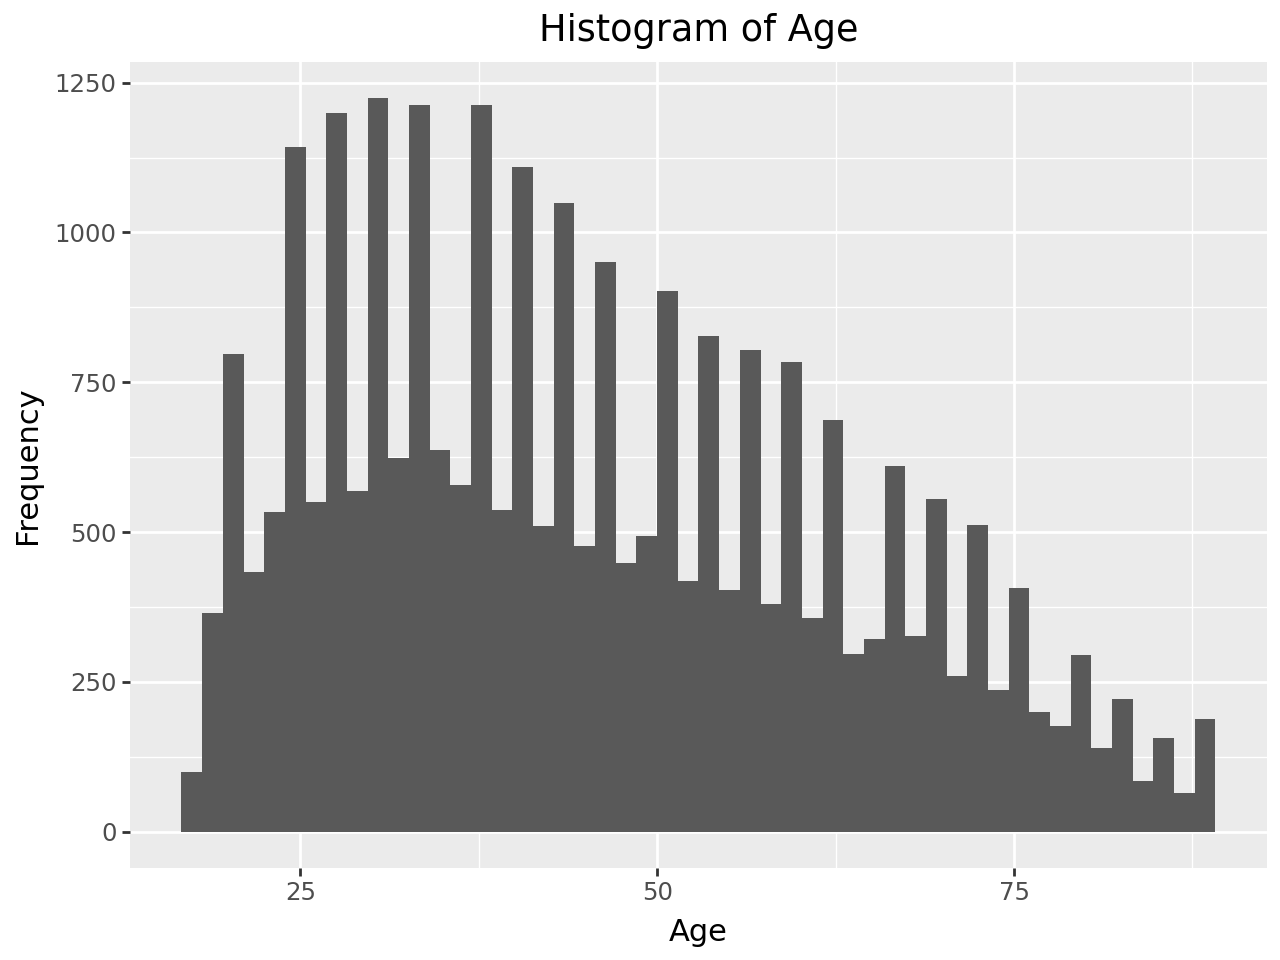

In [69]:
from plotnine import ggplot, aes, geom_histogram, geom_density, labs, ggsave

# Plot 1: Histogram of age with 50 bins
hist_plot = (
    ggplot(df, aes(x='age')) +
    geom_histogram(bins=50) +
    labs(x='Age', y='Frequency', title='Histogram of Age')
)

# Plot 2: Density plot of age with blue fill
density_plot = (
    ggplot(df, aes(x='age')) +
    geom_density(fill='blue') +
    labs(x='Age',  title='Density Plot of Age')
    
)

# Display the plots (if using an interactive environment, they will be rendered)
hist_plot

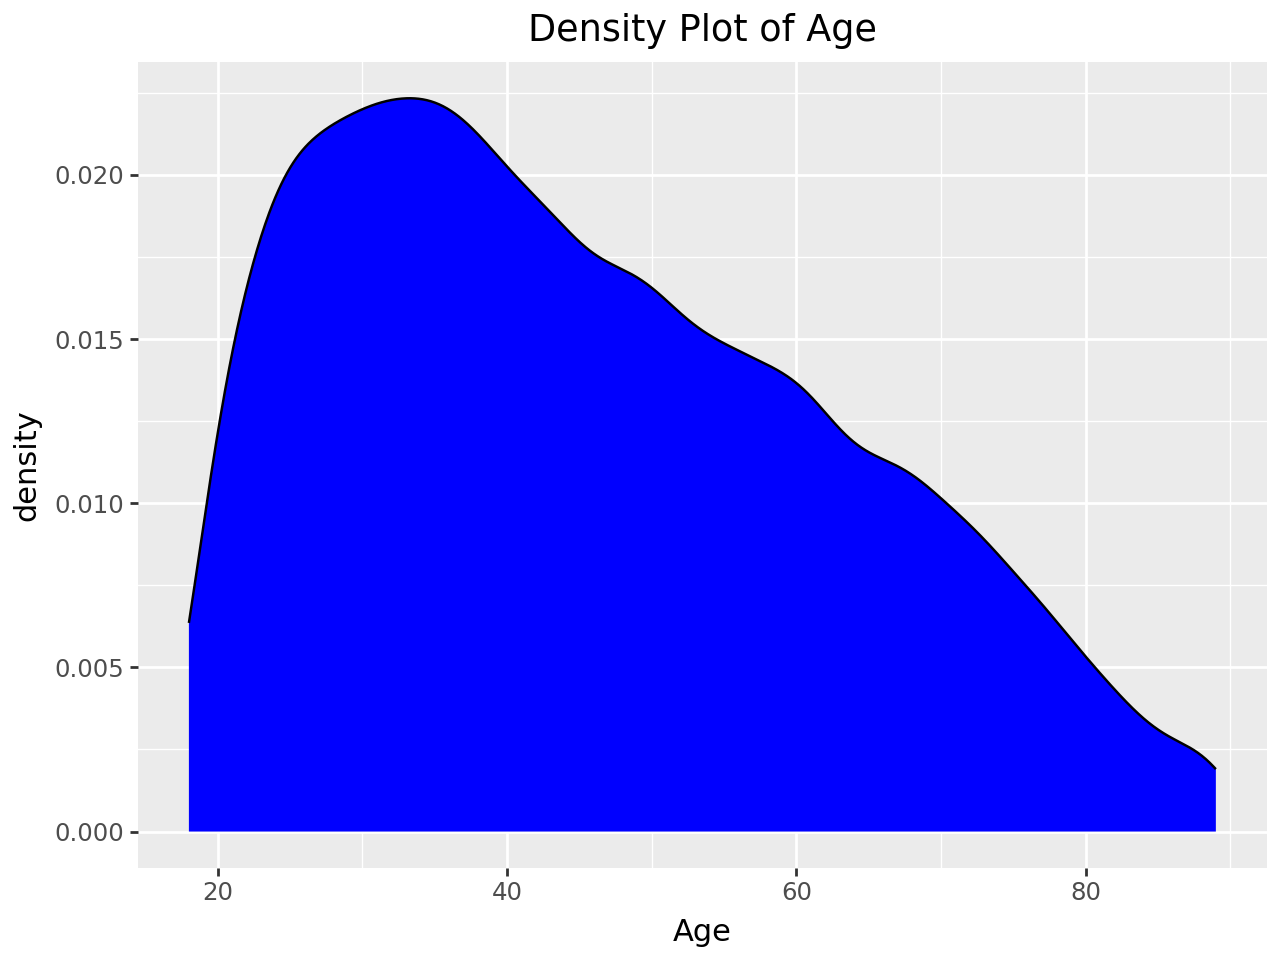

In [70]:
#Display second plot

density_plot

Save the best one

In [71]:
density_plot.save(filename='denisity_plot_age.png')

C:\Users\ilana brunner\anaconda3\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: denisity_plot_age.png


Using Seaborn and Matplotlib

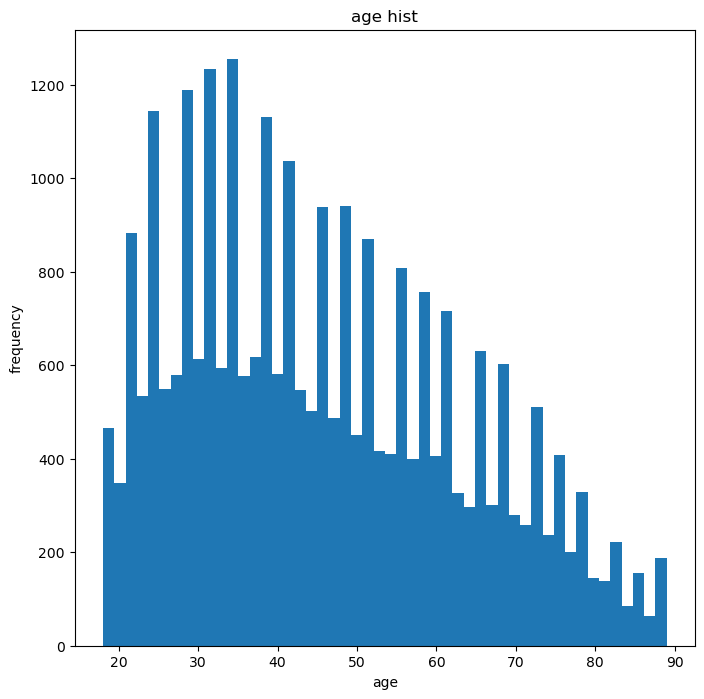

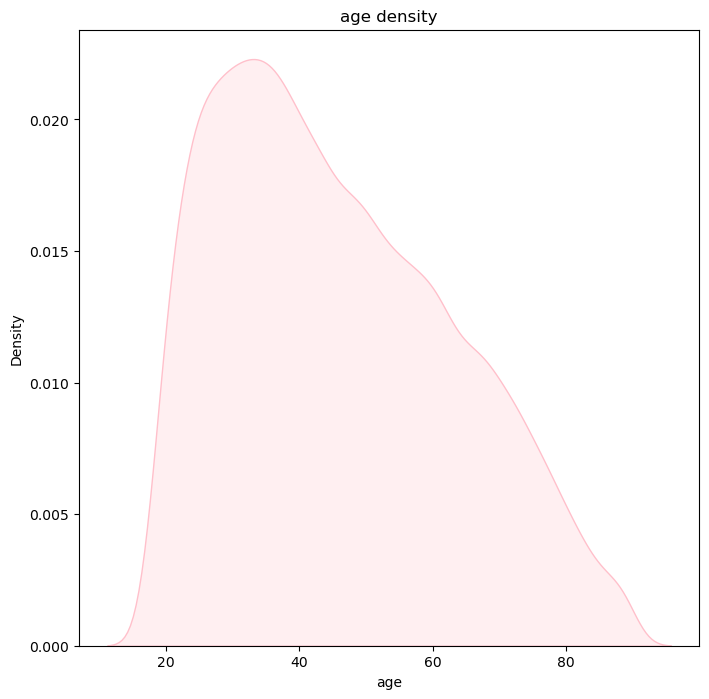

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))

plt.hist(df["age"], bins=50)
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("age hist")
plt.show()


plt.figure(figsize=(8,8))
sns.kdeplot(data = df,x = "age", fill=True, color = "pink")
plt.xlabel("age")
plt.title("age density")
plt.savefig("seaborn_density.pdf")
plt.show()





We will use plotninem (https://plotnine.org/) as our visualization tool for the first half of this lab. Create two different plots and identify the best looking plot you can to examine the `vocab` variable. Save the best looking plot as an appropriately-named PDF.

In [75]:
from plotnine import ggplot, aes, geom_bar, geom_point, labs, theme_minimal, ggsave, position_jitter

# Assume df is your GSSvocab DataFrame
# Ensure that vocab is treated as a categorical variable

df["vocab"]=df["vocab"].astype("category")

# ---- Plot 1: Bar Plot ----
bar_plot = (ggplot(df, aes(x='vocab')) +
            geom_bar(fill="blue") +
            labs(x = 'vocab', y = 'count', title = "bar plot vocab") +
            theme_minimal())
            


# Display the plots (in an interactive environment, these will render)
print(bar_plot)
bar_plot
bar_plot.save(filename="vocab_bar_plot.png", width = 10, height = 6 , units = "in", dpi = 300)

<ggplot: (640 x 480)>


C:\Users\ilana brunner\anaconda3\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 10 x 6 in image.
C:\Users\ilana brunner\anaconda3\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: vocab_bar_plot.png


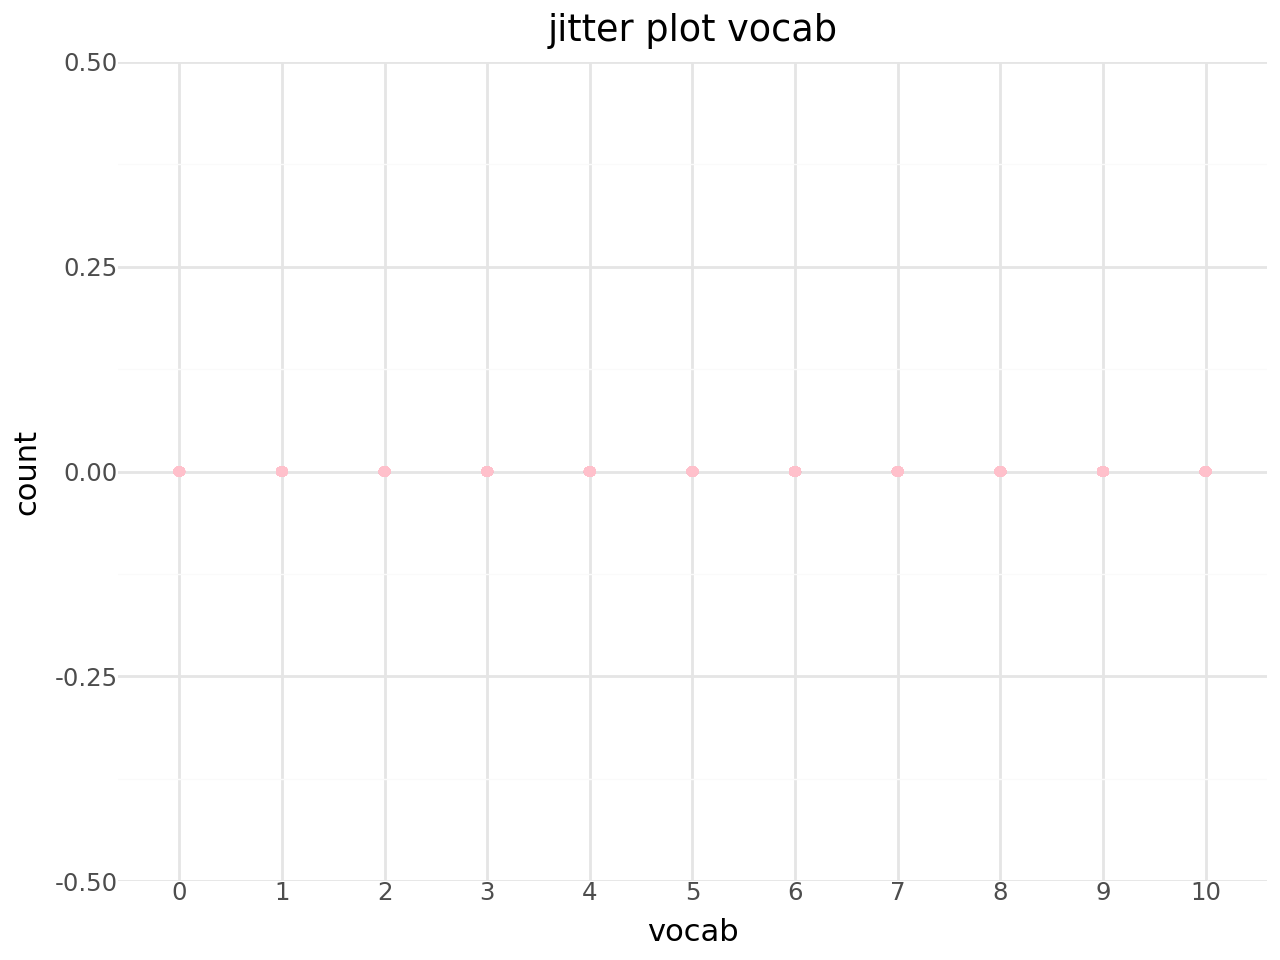

In [76]:
# Create a jitter plot for 'vocab'

jitter_plot = (ggplot(df, aes(x='vocab', y=0)) +
            geom_point(color="pink", size = 1, position = position_jitter(width = .01, height = 0 )) +
            labs(x = 'vocab', y = 'count', title = "jitter plot vocab") +
            theme_minimal())

jitter_plot

#jitter is kind of a fail
            

Create the best-looking plot you can to examine the `ageGroup` variable by `gender`. Does there appear to be an association? There are many ways to do this.

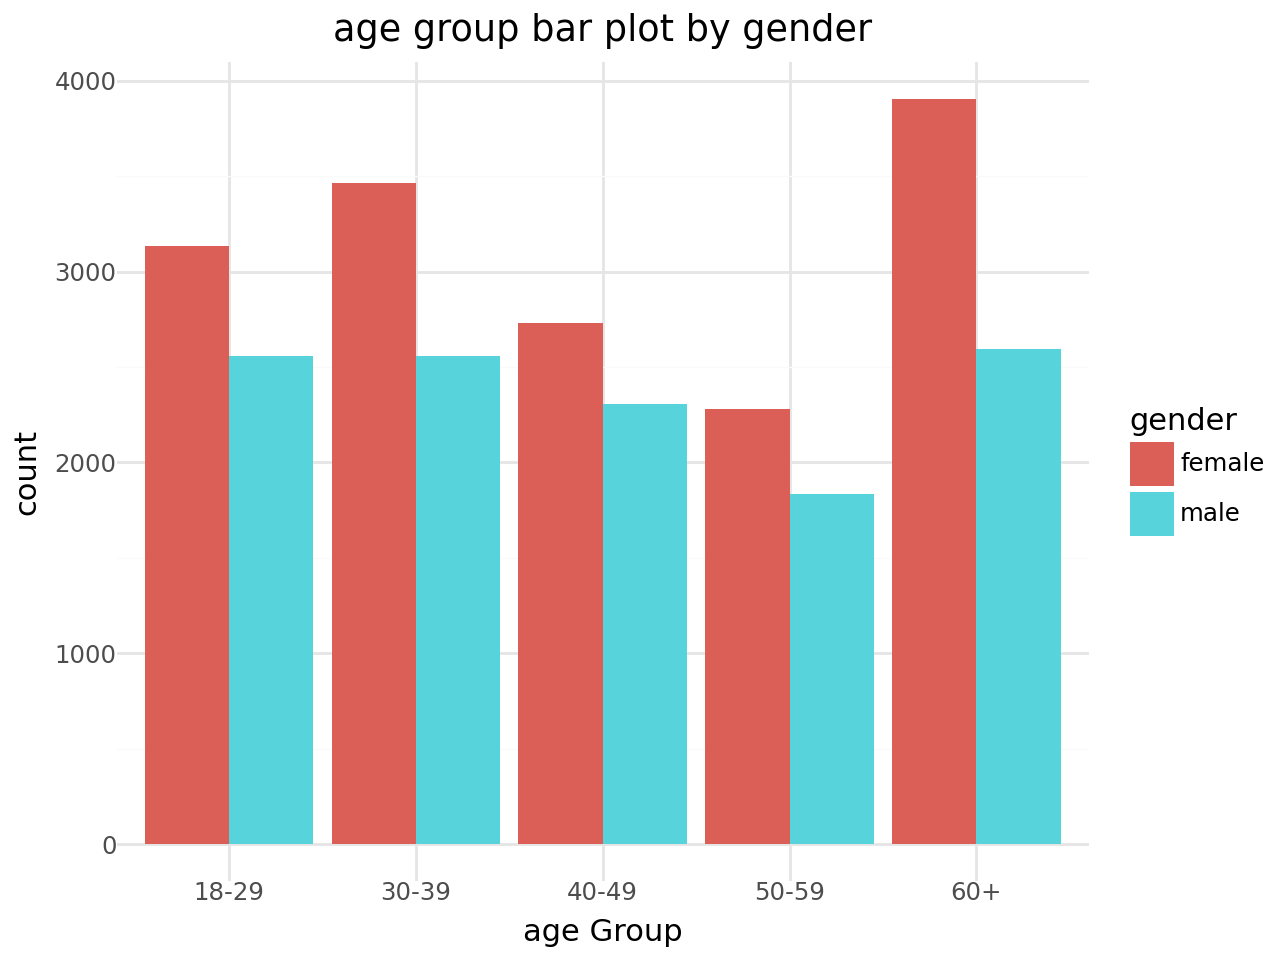

In [77]:
import pandas as pd
from plotnine import ggplot, aes, geom_violin, labs, theme_minimal

# Assume df is your DataFrame containing the columns 'ageGroup' and 'gender'.
# Make sure 'gender' is treated as a categorical variable:


df['gender'] = df['gender'].astype('category')



# Create a violin plot by switching the axes:
bar_plot_age = (ggplot(df, aes(x='ageGroup', fill = 'gender')) +
                geom_bar(position ='dodge') + 
                labs(x = 'age Group',  title = "age group bar plot by gender") +
                theme_minimal()) 


bar_plot_age 


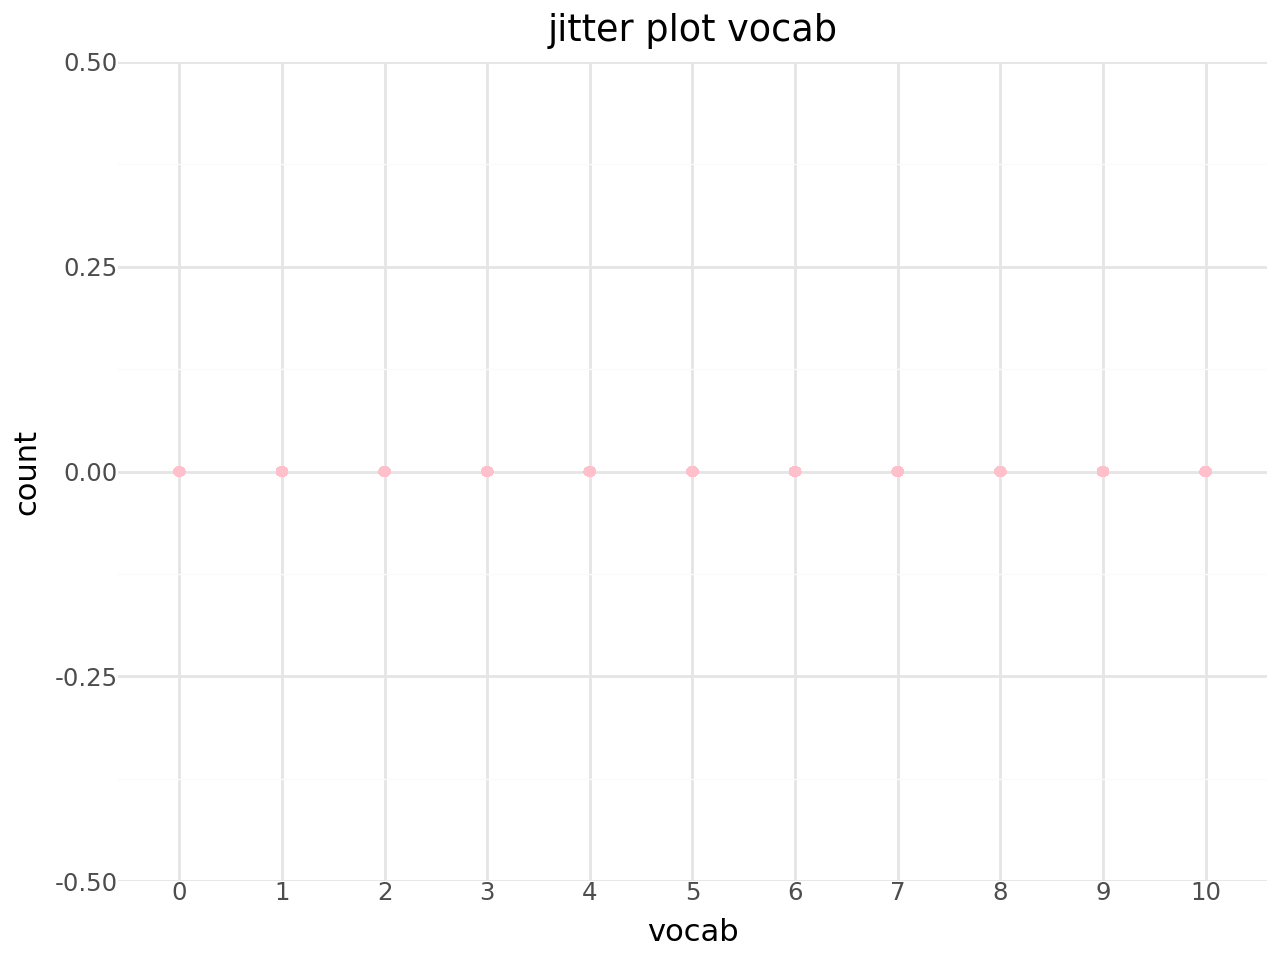

In [79]:
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, labs, theme_minimal

# Assume df is your DataFrame containing the columns 'ageGroup' and 'gender'
# Ensure 'gender' is treated as a categorical variable
df['gender'] = df['gender'].astype('category')



jitter_plot

Create the best-looking plot you can to examine the `vocab` variable by `age`. Does there appear to be an association?

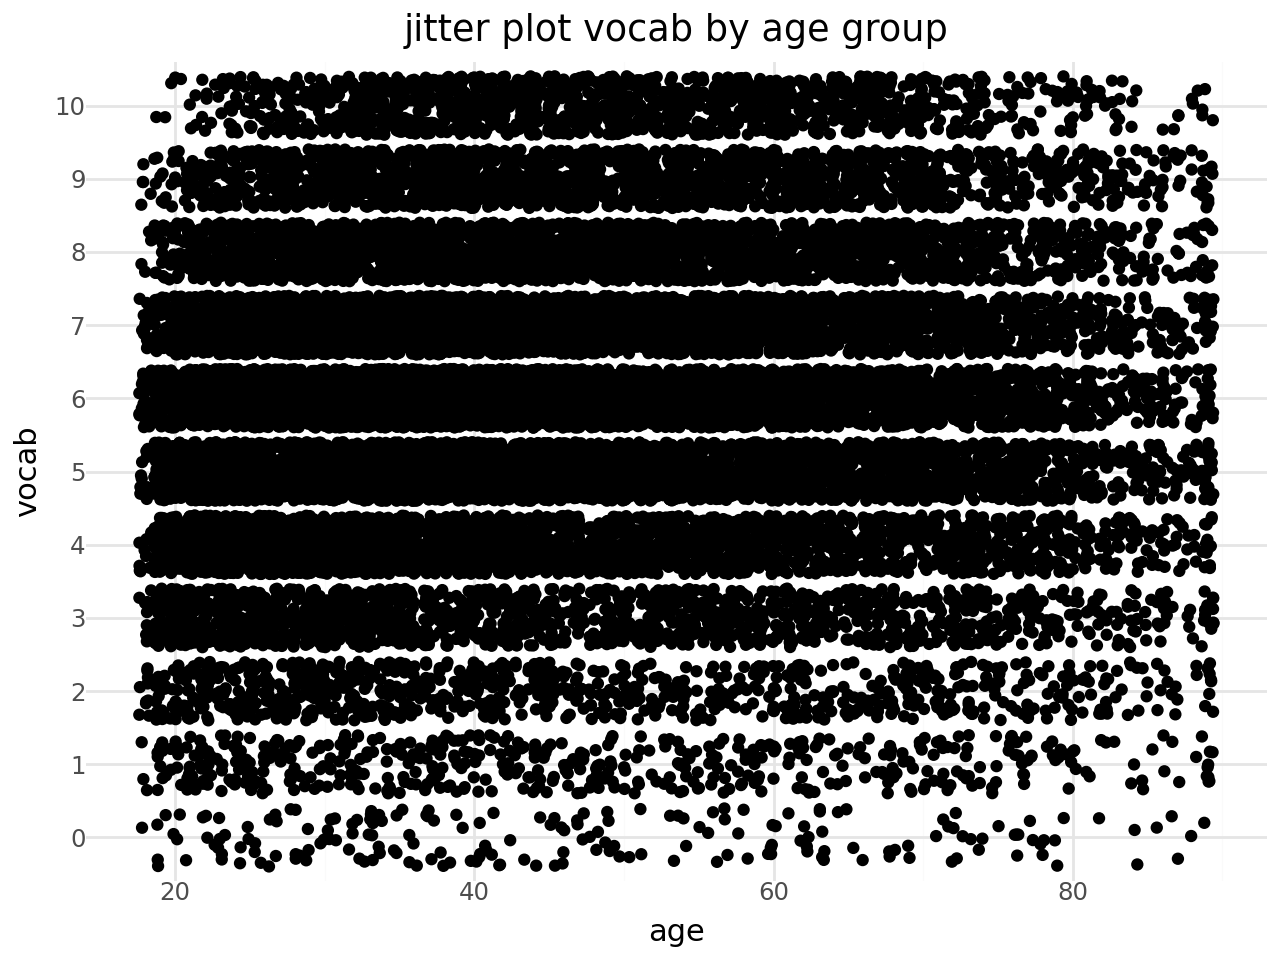

In [80]:
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, labs, theme_minimal

jitter_plot = (ggplot(df, aes(x="age", y="vocab")) +
            geom_jitter() +
            labs(x = 'age', title = "jitter plot vocab by age group") +
            theme_minimal())

jitter_plot




Add an estimate of $f(x)$ using the smoothing geometry to the previous plot. Does there appear to be an association now? First install pygam by uncommenting and running the cell below and then fill in the missing block in the subsequent cell.

In [81]:
pip install pygam

C:\Users\ilana brunner\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 16790 rows containing missing values.


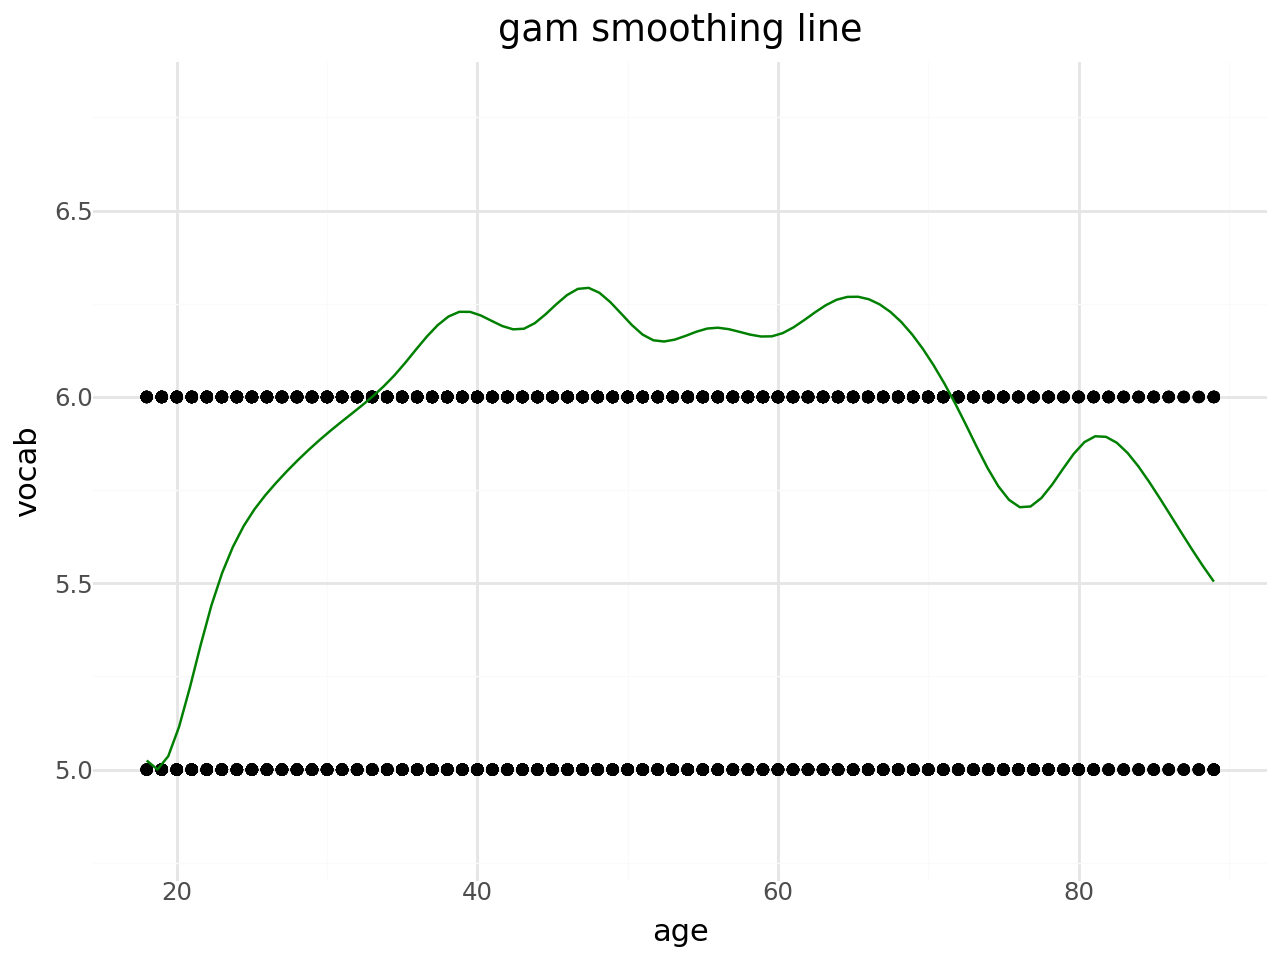

In [82]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal, scale_y_continuous

# Assume df is your DataFrame with 'age' and 'vocab' columns.
# Ensure 'vocab' is numeric (if it's not already)
df['vocab'] = pd.to_numeric(df['vocab'], errors='coerce')

# Fit a GAM model for vocab ~ s(age)
X = df[['age']].values  
y = df['vocab'].values
gam = LinearGAM(s(0)).fit(X, y)

# Create a grid of age values for prediction
age_grid = np.linspace(df['age'].min(), df['age'].max(), 100)
gam_preds = gam.predict(age_grid)

# Create a DataFrame with the predictions
gam_df = pd.DataFrame({
    'age': age_grid,
    'vocab': gam_preds
})

# Create the plot with y-axis limits between 4.8 and 6.8
plot = (ggplot(df, aes(x = 'age', y = 'vocab')) +
        geom_point(alpha = .5) +
        geom_line(data=gam_df, mapping = aes(x = 'age', y = 'vocab'), color = "green") +
        labs(title = "gam smoothing line", x = 'age', y = 'vocab') +
        scale_y_continuous(limits = (4.8,6.8)) +
        theme_minimal())

plot


Using the plot from the previous question, create the best looking plot overloading with variable `gender`. Does there appear to be an interaction of `gender` and `age`?

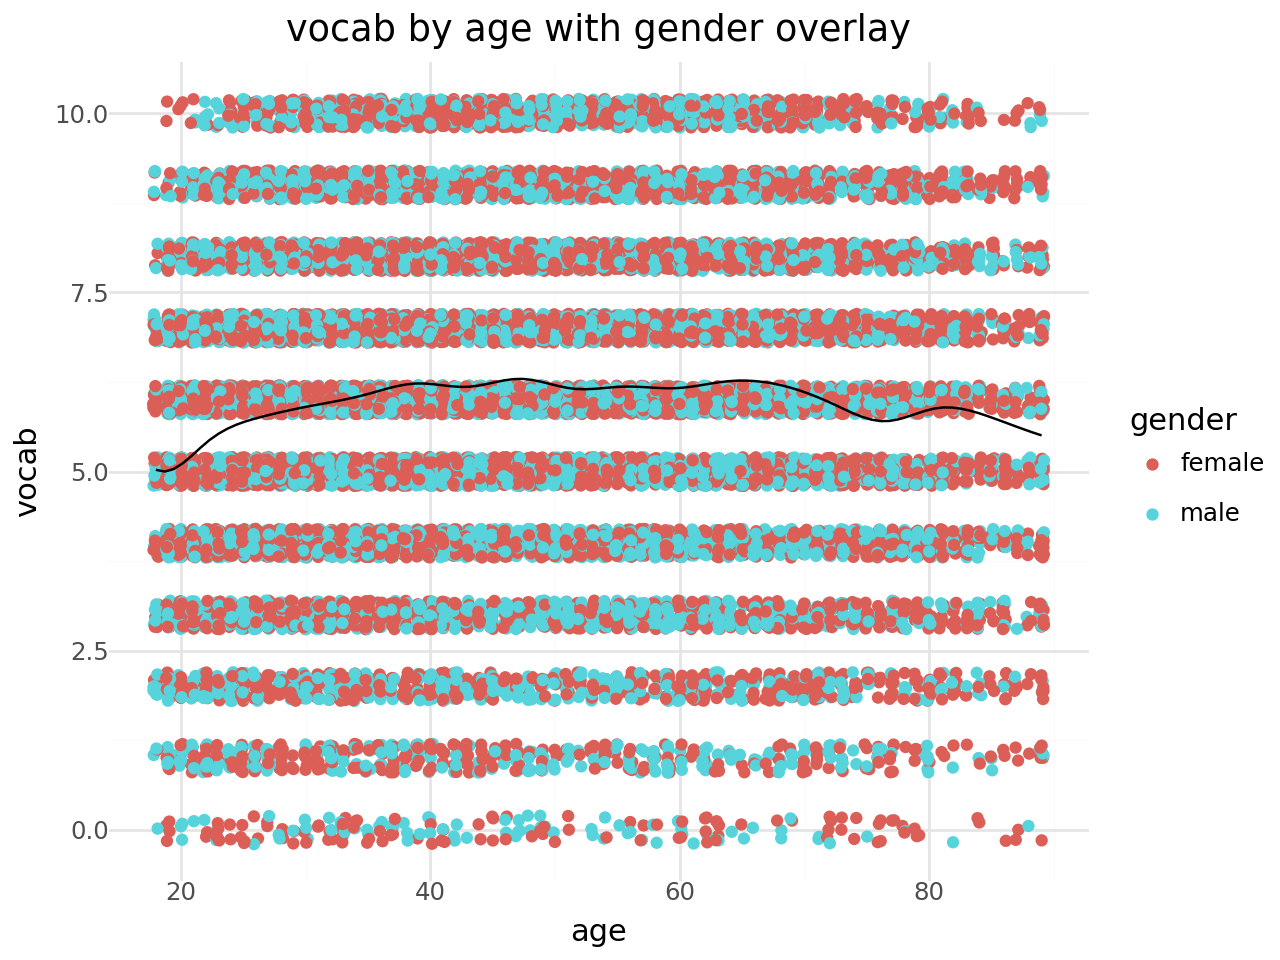

In [83]:
from plotnine import ggplot, aes, geom_jitter, geom_smooth, labs, theme_minimal

# Assume df is your DataFrame containing 'age', 'vocab', and 'gender'
# For example, df = pd.read_csv("GSSvocab.csv")
plot = (ggplot(df, aes(x = 'age', y = 'vocab')) +
        geom_jitter(aes(color = 'gender'), width = 0.2 , height = 0.2) + 
        geom_line(data=gam_df, mapping = aes(x = 'age', y = 'vocab'), color = "black") +
        labs(title = "vocab by age with gender overlay", x = 'age', y = 'vocab') +
        theme_minimal())

plot

Using the plot from the previous question, create the best looking plot overloading with variable `nativeBorn`. Does there appear to be an interaction of `nativeBorn` and `age`?

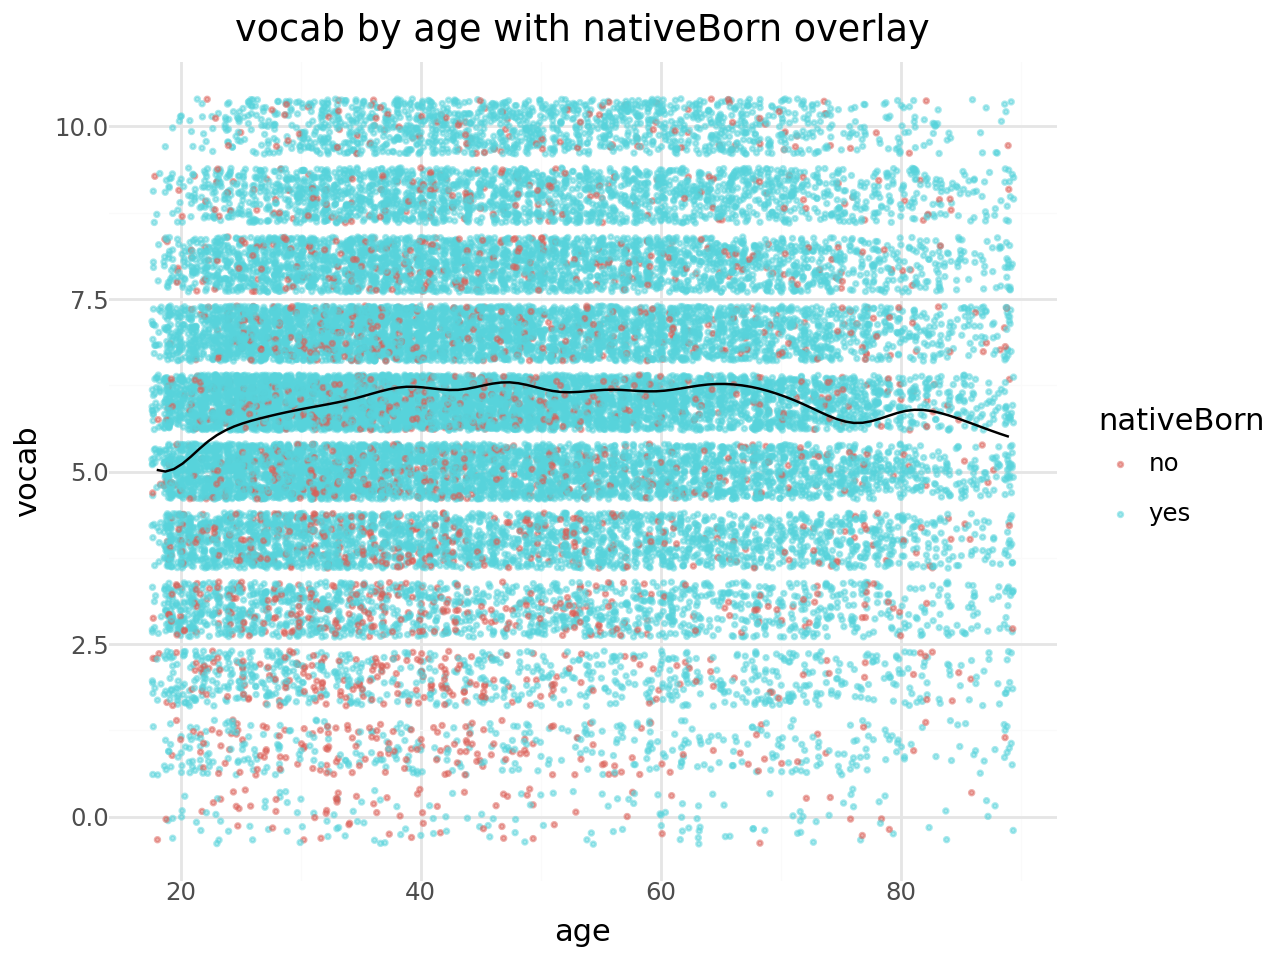

In [84]:
from plotnine import ggplot, aes, geom_jitter, geom_smooth, labs, theme_minimal

# Assume df is your GSSvocab DataFrame containing 'age', 'vocab', and 'nativeBorn'


plot = (ggplot(df, aes(x = 'age', y = 'vocab')) +
        geom_jitter(aes(color = 'nativeBorn'), size = 0.5 , alpha = 0.5) + 
        geom_line(data=gam_df, mapping = aes(x = 'age', y = 'vocab'), color = "black") +
        labs(title = "vocab by age with nativeBorn overlay", x = 'age', y = 'vocab') +
        theme_minimal())

plot


Create two different plots and identify the best-looking plot you can to examine the `vocab` variable by `educGroup`. Does there appear to be an association?

In [85]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_density, labs, theme_minimal

# Assume df is your GSSvocab DataFrame containing the columns 'vocab' and 'educGroup'
# Ensure that 'educGroup' is treated as a categorical variable
df['educGroup'] = df[educGroup].astype('category')

# ---- Plot 1: Boxplot of vocab by educGroup ----
boxplot = (ggplot(df, aes(x='educGroup', y='vocab')) +
           geom_boxplot() +
           labs(title = 'vocab by education group') +
           theme_minimal())
          
boxplot


NameError: name 'educGroup' is not defined

In [ ]:
# ---- Plot 2: Density Plot of vocab with fill by educGroup ----
density_plot = (ggplot(df, aes(x = 'vocab', fill = 'educGroup')) +
        geom_density(adjust = 2 , alpha = 0.5) + 
        labs(title = 'vocab by age with nativeBorn overlay', x = 'age', y = 'vocab') +
        theme_minimal())


density_plot

Using the best-looking plot from the previous question, create the best looking overloading with variable `gender`. Does there appear to be an interaction of `gender` and `educGroup`?

In [ ]:
boxplot = (ggplot(df, aes(x='educGroup', y='vocab')) +
           geom_boxplot(aes(color = 'gender')) +
           labs(title = 'box plot vocab by education group and gender') +
           theme_minimal())
          
boxplot

Using facets, examine the relationship between `vocab` and `ageGroup`. You can drop year level `(Other)`. Are we getting dumber?

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_density, facet_grid, labs, theme_minimal

# Ensure 'ageGroup' is treated as a categorical variable
df['ageGroup'] = df['ageGroup'].astype('category')

# Drop the unwanted level "(Other)" from ageGroup
df_subset = df[df['ageGroup'] != "(Other)"]

# Create the density plot faceted by ageGroup
plot = (ggplot(df_subset, aes(x='vocab', fill='ageGroup')) +
        geom_density(adjust=2, alpha=0.5) +
        facet_grid('. ~ ageGroup') +
        labs(title="Vocab Distribution by Age Group", x="Vocab Score", y="Density") +
        theme_minimal())

plot


#Logistic Regression

Let's consider the Pima Indians Diabetes dataset from 1988:

In [ ]:
import statsmodels.api as sm

# Load the Pima.tr2 dataset from the MASS package
pima_dataset = sm.datasets.get_rdataset("Pima.tr2", package="MASS")
df = pima_dataset.data

# Display the first few rows
df

Note the missing data. We will learn about how to handle missing data towards the end of the course. For now, replace, the missing data in the design matrix X with the mean of the feature x_dot,j. 

Now let's fit a log-odds linear model of y=1 (type is "diabetic") on just the `glu` variable. Import minimize from scipy.optimize to fit the model.

In [ ]:
# Create the design matrix X with an intercept column 
pima = pd.concat([pd.Series(1, index = df.index, name ="intercept"), df], axis = 1)


import numpy as np
import statsmodels.api as sm
from scipy.optimize import minimize


# Extract the variables: glu (glucose) and diabetic (target variable y)
X = df['glu']
y = df['type'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert to 1 (diabetic) and 0 (non-diabetic)

# Add an intercept term to X (for the bias in the logistic model)
X = sm.add_constant(X)

# Define the logistic regression log-likelihood function
def log_likelihood(beta, X, y):
    # Logistic function
    logit = 1 / (1 + np.exp(-np.dot(X, beta)))
    # Log-likelihood
    return -np.sum(y * np.log(logit) + (1 - y) * np.log(1 - logit))

# Initial guess for the parameters (intercept and coefficient for glu)
initial_beta = np.zeros(X.shape[1])

# Use minimize to find the best fitting parameters
result = minimize(log_likelihood, initial_beta, args=(X, y), method='BFGS')

# Extract the fitted coefficients
fitted_beta = result.x
print("Fitted coefficients:", fitted_beta)



# Replace missing values in each column with the mean of that column
pima = pima.fillna(pima.mean())

# Verify that missing values have been replaced


In [ ]:
import numpy as np
from scipy.optimize import minimize

y = pima['type'].values
X = pima['glu'].values

# Define the negative log-likelihood function for logistic regression
def neg_loglik(beta):
  
    return 

# Use minimize from SciPy to optimize the negative log-likelihood
result = minimize()
print(result)

Extra Credit(+5): write a `fit_logistic_regression` function which takes in X, y and returns b which uses the optimization routine.

In [ ]:
# Convert the target variable ('type') to binary (1 for "Yes", 0 for "No")
y = (pima['type'] == 'Yes').astype(int).values
X = pima['glu'].values

# Add an intercept (bias) term to X
X = np.column_stack((np.ones(X.shape[0]), X))

# Define the negative log-likelihood function
def neg_loglik(beta, X, y):
    logits = np.dot(X, beta)
    probabilities = 1 / (1 + np.exp(-logits))
    return -np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))

# Optimize the negative log-likelihood
initial_beta = np.zeros(X.shape[1])  # Initial guess for beta
result = minimize(neg_loglik, initial_beta, args=(X, y), method='BFGS')

# Print the estimated coefficients
print("Fitted Coefficients:", result.x)

# Extra Credit: Function to fit logistic regression
def fit_logistic_regression(X, y):
    """Fits a logistic regression model using numerical optimization."""
    X = np.column_stack((np.ones(X.shape[0]), X))  # Add intercept
    initial_beta = np.zeros(X.shape[1])  # Initialize coefficients
    result = minimize(neg_loglik, initial_beta, args=(X, y), method='BFGS')
    return result.x  # Return estimated coefficients

# Example usage:
beta_hat = fit_logistic_regression(pima['glu'].values, (pima['type'] == 'Yes').astype(int).values)
print("Estimated Coefficients from function:", beta_hat)

Run a logistic regression of y=1 (type is "diabetic") on just the `glu` variable using sm from statsmodels.api and report b_0, b_1.

In [ ]:
import statsmodels.api as sm

# Convert the target variable ('type') to binary (1 for diabetic, 0 for non-diabetic)
y = (pima['type'] == 'Yes').astype(int)

# Add a constant column for the intercept
X = sm.add_constant(pima['glu'])

# Fit the logistic regression model using y as the response and glu as the predictor
model = sm.Logit(y, X)
result = model.fit()

# Extract the coefficients: b0 (intercept) and b1 (for glu)
coef = result.params

print("b0 (Intercept):", coef[0])
print("b1 (glu):", coef[1])

Comment on how close the results from Statsmodels built in function was to your optimization call.

In [ ]:
# Compare coefficients from Statsmodels and Scipy optimization
b0_statsmodels, b1_statsmodels = result.params  # From Statsmodels
b0_scipy, b1_scipy = fit_logistic_regression(pima['glu'].values, (pima['type'] == 'Yes').astype(int))

print(f"Statsmodels:   b0 = {b0_statsmodels:.5f}, b1 = {b1_statsmodels:.5f}")
print(f"Scipy Minimize: b0 = {b0_scipy:.5f}, b1 = {b1_scipy:.5f}")


Interpret the value of b_1 from Statsmodels smf module.

# In simpler terms, when a person’s glucose level goes up by 1 unit, the odds of having diabetes increase by about 4.2%

Interpret the value of b_0 from Statsmodels smf module.

#Since b0 is very negative (-5.83526), it suggests that when glucose is 0, the odds of having diabetes are extremely low

Plot the probability of y=1 from the minimum value of `glu` to the maximum value of `glu`.

C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


         Current function value: 0.000000
         Iterations: 35


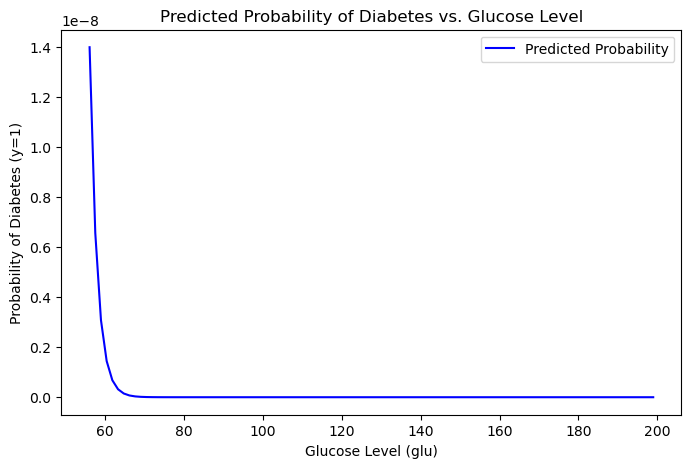

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the target variable ('type') to binary (1 for diabetic, 0 for non-diabetic)
pima['type'] = (pima['type'] == 'Yes').astype(int)

# Fit the logistic regression model
X = sm.add_constant(pima['glu'])  # Add intercept
y = pima['type']
model = sm.Logit(y, X).fit()

# Create a new DataFrame with the glu values sorted from min to max
glu_range = np.linspace(pima['glu'].min(), pima['glu'].max(), 100)
new_data = pd.DataFrame({'const': 1, 'glu': glu_range})

# Compute the predicted probabilities for y = 1 using the fitted model
new_data['predicted_prob'] = model.predict(new_data)

# Plot the predicted probability curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=new_data['glu'], y=new_data['predicted_prob'], color='blue', label="Predicted Probability")
plt.xlabel("Glucose Level (glu)")
plt.ylabel("Probability of Diabetes (y=1)")
plt.title("Predicted Probability of Diabetes vs. Glucose Level")
plt.legend()
plt.show()

Run a logistic regression of y=1 (type is "diabetic") on all variables using statsmodels sm module and report the b vector.

In [87]:
# Grab all the columns except 'type'
X = pima.iloc[:,:8]

# Drop any rows with missing values to avoid errors
pima = pima.dropna()

# Fit the logistic regression model using y as the response and glu as the predictor
model = sm.Logit(y, X).fit()

# Report the estimated coefficients (b vector)
print("Coefficient vector (b):")
print(model.params)

         Current function value: 0.000000
         Iterations: 35
Coefficient vector (b):
intercept   -18.015523
npreg         0.031142
glu          -0.083057
bp           -0.054922
skin          0.007418
bmi          -0.174301
ped          -0.196654
age          -0.005842
dtype: float64


C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunn

Predict the probability of diabetes for someone with a blood sugar of 150.

In [88]:
import pandas as pd

# Convert the target variable ('type') to binary (1 for diabetic, 0 for non-diabetic)
pima['type'] = (pima['type'] == 'Yes').astype(int)

# Drop any rows with missing values to avoid errors
pima = pima.dropna()

# Compute means for the other predictor variables
predictor_means = pima.drop(columns=['type', 'glu']).mean()

# Create a new data point using 150 for 'glu' and the means for the other variables
glu_150 = pd.DataFrame({
    'const': [1],  # Add intercept term
    'npreg': [predictor_means['npreg']],
    'glu': [150],  # Given blood sugar level
    'bp': [predictor_means['bp']],
    'skin': [predictor_means['skin']],
    'bmi': [predictor_means['bmi']],
    'ped': [predictor_means['ped']],
    'age': [predictor_means['age']]
})

# Fit the logistic regression model with all predictors
X = sm.add_constant(pima.drop(columns=['type']))
y = pima['type']
model = sm.Logit(y, X).fit()

# Predict the probability of diabetes for someone with a glucose level of 150
predicted_prob = model.predict(glu_150)[0]

print("Predicted probability of diabetes for blood sugar 150:", round(predicted_prob, 4))

         Current function value: 0.000000
         Iterations: 35
Predicted probability of diabetes for blood sugar 150: 0.0


C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunn

For 100 people with blood sugar of 150, what is the probability more than 75 of them have diabetes? (You may need to review 241 to do this problem).

In [89]:

import scipy.stats as stats

# Predicted probability of diabetes for a glucose level of 150 (from the previous logistic regression model)
prob_diabetes_150 = predicted_prob  # This is from the previous code

# Number of trials (people)
n = 100

# Calculate the cumulative probability of having 75 or fewer people with diabetes
p_less_than_or_equal_75 = stats.binom.cdf(75, n, prob_diabetes_150)

# The probability of more than 75 people having diabetes
p_more_than_75 = 1 - p_less_than_or_equal_75

print("Probability that more than 75 out of 100 people with blood sugar of 150 have diabetes:", round(p_more_than_75, 4))


Probability that more than 75 out of 100 people with blood sugar of 150 have diabetes: 0.0


Plot the in-sample log-odds predictions (y-axis) versus the real response values (x-axis).

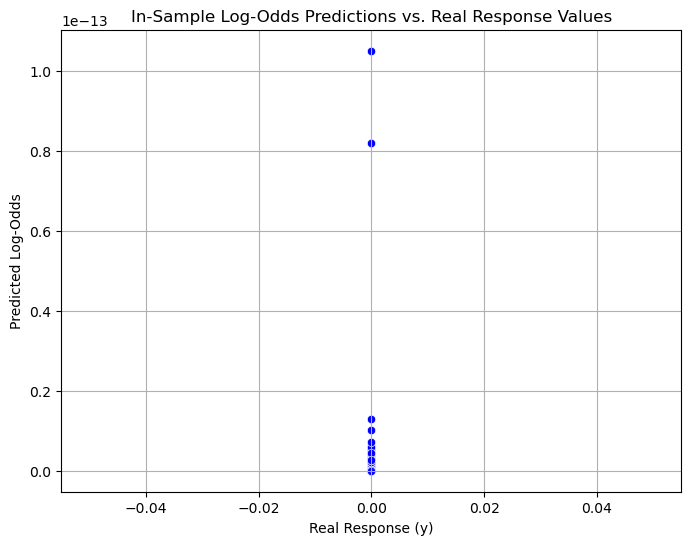

In [90]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the logistic regression model fitted
# Calculate the log-odds predictions (linear predictor) using the model
log_odds_predictions = model.predict(X)  # X is the feature matrix used for fitting the model

# Create a DataFrame that holds the real responses and the log-odds predictions
df_plot = pd.DataFrame({
    'Real_Response': y,           # actual binary response values (0 or 1)
    'Predicted_LogOdds': log_odds_predictions
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_LogOdds', color='blue')
plt.xlabel("Real Response (y)")
plt.ylabel("Predicted Log-Odds")
plt.title("In-Sample Log-Odds Predictions vs. Real Response Values")
plt.grid(True)
plt.show()


Plot the in-sample probability predictions (y-axis) versus the real response values (x-axis).

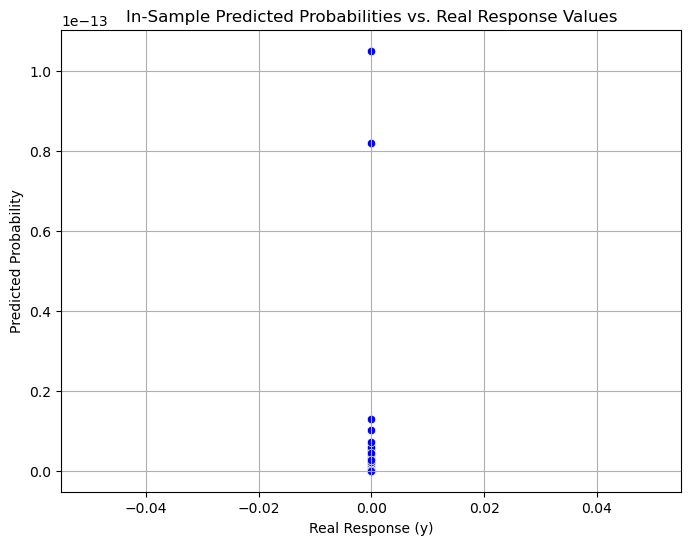

In [91]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Compute predicted probabilities using your fitted logistic regression model
predicted_probs = model.predict(X)  # X is the feature matrix used for fitting the model

# Create a DataFrame that holds the actual binary responses and the predicted probabilities
df_plot = pd.DataFrame({
    'Real_Response': y,                 # Actual response values (0 or 1)
    'Predicted_Probability': predicted_probs
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_Probability', color='blue')
plt.xlabel("Real Response (y)")
plt.ylabel("Predicted Probability")
plt.title("In-Sample Predicted Probabilities vs. Real Response Values")
plt.grid(True)
plt.show()



Comment on how well you think the logistic regression performed in-sample.

all the points are on top of 0.0 on the x-axis (the real response values), this indicates that the logistic regression model is consistently predicting the same outcome for every data point — specifically, it is always predicting a response of 0 (non-diabetic) for every instance, regardless of the actual values of the features (like glucose levels or other predictors)

Calculate the in-sample Brier score.

In [92]:
import numpy as np

# Assuming y is the actual binary response (0 or 1)
# and predicted_probs are the predicted probabilities from your logistic regression model

# Compute the in-sample Brier score
# Brier Score = (1/n) * sum( (y - predicted_prob)^2 )
brier_score = np.mean((y - predicted_probs) ** 2)

print("In-sample Brier score:", brier_score)


In-sample Brier score: 9.191905110196042e-29


Calculate the in-sample log-scoring rule.

In [93]:
import numpy as np

# Assuming y is the actual binary response (0 or 1)
# and predicted_probs are the predicted probabilities from your logistic regression model

# To avoid taking log(0), add a small constant epsilon
epsilon = 1e-9

# Calculate the log scoring rule (negative log-likelihood)
log_score = -np.mean(
    y * np.log(predicted_probs + epsilon) + (1 - y) * np.log(1 - predicted_probs + epsilon)
)

print("In-sample log scoring rule:", log_score)


In-sample log scoring rule: -9.999984546534185e-10


Run a probit regression of y=1 (type is "diabetic") on all variables and report the b vector.

In [94]:
import statsmodels.api as sm

# Grab all the columns except 'type' (assuming 'type' is the response variable)
X = pima.iloc[:, :-1]  # All columns except the last one (type)
X = sm.add_constant(X)  # Add an intercept term to the model

# Response variable: 'type' (diabetic or not)
y = pima['type']

# Fit the probit regression model
model = sm.Probit(y, X).fit()

# Report the estimated coefficient vector (b)
print("Coefficient vector (b):")
print(model.params)


         Current function value: 0.000000
         Iterations: 35
Coefficient vector (b):
intercept   -6.770097
npreg        0.002463
glu         -0.005669
bp          -0.014674
skin        -0.017970
bmi          0.003401
ped         -0.032876
age          0.001622
dtype: float64


C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunn

Does the weight estimates here in the probit fit have different signs than the weight estimates in the logistic fit? What does that mean?

The signs (positive or negative) of the coefficients in both models are mostly similar, meaning both models suggest similar directions for the relationships (e.g., higher glucose might reduce the likelihood of being diabetic in both models),  the signs of the coefficients are roughly the same, but the scale of the numbers is different due to the models using different ways to predict the probability.

Plot the in-sample probability predictions (y-axis) versus the real response values (x-axis).

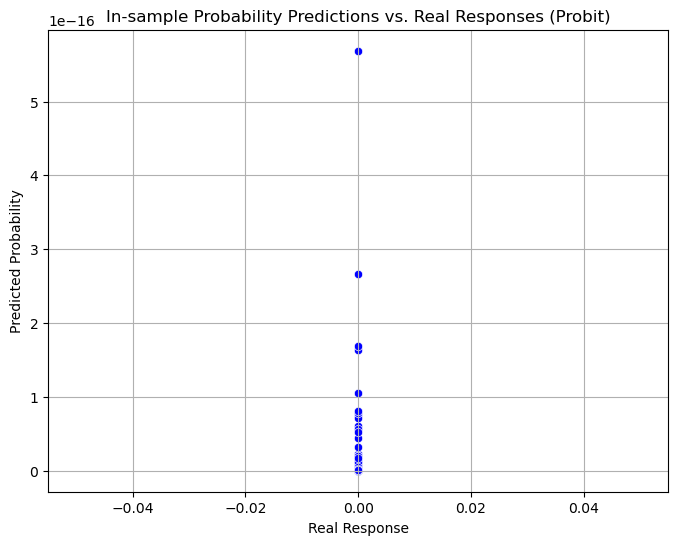

In [95]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'model' is your fitted probit model and 'X' is your design matrix with the intercept
probit_probs = model.predict(X)  # Predict probabilities using the probit model

# Create a DataFrame that holds the actual binary responses and the predicted probabilities
df_plot = pd.DataFrame({
    'Real_Response': y,                 # Actual response values (0 or 1)
    'Predicted_Probability': probit_probs
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_Probability', color='blue')
plt.xlabel("Real Response")
plt.ylabel("Predicted Probability")
plt.title("In-sample Probability Predictions vs. Real Responses (Probit)")
plt.grid(True)
plt.show()



Calculate the in-sample Brier score.

In [96]:
import numpy as np

# Compute the in-sample Brier score
# Brier Score = (1/n) * sum( (y - predicted_prob)^2 )
Probit_brier_score = np.mean((y - probit_probs) ** 2)

print("In-sample Brier score:", Probit_brier_score)


In-sample Brier score: 2.5044631922169532e-33


Calculate the in-sample log-scoring rule.

In [97]:
import numpy as np

# To avoid taking log(0), add a small constant epsilon
epsilon = 1e-9

# Calculate the negative average log-likelihood (log scoring rule)
Probit_log_score = -np.mean(
    y * np.log(probit_probs + epsilon) + (1 - y) * np.log(1 - probit_probs + epsilon)
)

print("In-sample log scoring rule:", Probit_log_score)


In-sample log scoring rule: -1.0000000678074713e-09


Which model did better in-sample?

# Both scores are extremely close to zero, indicating that both models (logistic or probit) have performed very well in-sample. Given the values are so close to zero, both models likely perform similarly, with the Brier score being slightly more sensitive in this case, showing a nearly perfect fit.

Compare both models oos using the Brier score and a test set with 1/3 of the data.

In [98]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

# Grab all the columns except 'type'
X = pima.iloc[:, :8]
y = pima['type'].values

# Split the data: 2/3 training, 1/3 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42
)

# Add a constant column to the training and test sets for the intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the logistic regression (logit) model on the training set
logit_model = sm.Logit(y_train, X_train_const)
logit_result = logit_model.fit()

# Fit the probit model on the training set
probit_model = sm.Probit(y_train, X_train_const)
probit_result = probit_model.fit()

# Predict probabilities on the test set for both models
logit_probs = logit_result.predict(X_test_const)
probit_probs = probit_result.predict(X_test_const)

# Calculate the out-of-sample Brier score for each model
# Brier Score = mean( (actual - predicted)^2 )
brier_logit = np.mean((y_test - logit_probs) ** 2)
brier_probit = np.mean((y_test - probit_probs) ** 2)

# Print the out-of-sample Brier scores
print("Out-of-sample Brier Score (Logit):", brier_logit)
print("Out-of-sample Brier Score (Probit):", brier_probit)


         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35
Out-of-sample Brier Score (Logit): 3.0657970480233814e-26
Out-of-sample Brier Score (Probit): 5.535704027687935e-33


C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunner\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
C:\Users\ilana brunn

Which model did better oos?

#The Probit model did better out-of-sample because it has a significantly smaller Brier score. This means its predictions were closer to the actual outcomes compared to the Logit model.